In [ ]:
# Calcular log-rendimientos
df['rendimiento'] = np.log(df['Close']).diff()

# Eliminar NaN del primer valor
df = df.dropna()


In [ ]:
# Convertir resultados a DataFrame
df_resultados = pd.DataFrame(resultados)

# Ver los resultados ordenados
df_resultados

,Tramo,Inicio,Fin,RMSE,MAE,AIC,BIC,Orden ARIMA
0,Tramo 1,2010-02-03,2012-02-07,0.017875,0.012842,-2691.395198,-2674.395297,"(2, 0, 1)"
1,Tramo 2,2012-02-08,2015-09-01,0.013806,0.010268,-5192.144060,-5158.457645,"(4, 0, 2)"
2,Tramo 3,2015-09-02,2017-11-24,0.013145,0.008998,-3347.731145,-3343.376775,"(0, 0, 0)"
3,Tramo 4,2017-11-27,2019-06-20,0.008226,0.006384,-2682.913030,-2678.929093,"(0, 0, 0)"
4,Tramo 5,2019-06-21,2021-09-17,0.015590,0.010164,-3152.914696,-3139.846373,"(0, 0, 2)"
5,Tramo 6,2021-09-20,2025-01-30,0.010065,0.007571,-5479.922602,-5475.163347,"(0, 0, 0)"
6,Serie completa,2010-02-02,2025-01-30,0.013515,0.009412,-22129.660255,-22079.638602,"(3, 0, 4)"


In [ ]:
!pip install pmdarima
!pip install statsmodels
!pip install matplotlib
!pip install seaborn


In [ ]:
# Fechas de cambio estructural según test BDS
cortes = ['2012-02-07', '2015-09-01', '2017-11-24', '2019-06-20', '2021-09-17']
cortes = pd.to_datetime(cortes)
cortes = [df.index.min()] + list(cortes) + [df.index.max()]  # añadir inicio y fin

# Crear tramos
tramos = [(cortes[i], cortes[i+1]) for i in range(len(cortes)-1)]

In [1]:
from datetime import datetime, timedelta

# Fechas de cortes como diccionario (ya proporcionado)
fechas = {
    'IBEX 35': ['2012-02-07', '2015-09-01', '2017-11-24', '2019-06-20', '2021-09-17'],
    'Acciona': ['2016-07-07', '2020-05-06', '2023-04-17'],
    'Acerinox': ['2012-10-23', '2014-04-04', '2017-04-12', '2021-10-05', '2023-08-02'],
    'ACS': ['2014-03-12', '2016-08-05', '2019-10-30', '2021-03-03', '2023-11-02'],
    'ArcelorMittal': ['2012-11-21', '2020-06-05', '2023-10-17'],
    'Banco Sabadell': ['2014-06-05', '2016-07-29', '2020-06-01'],
    'Banco Santander': ['2012-01-27', '2016-11-25', '2019-12-03', '2021-11-29'],
    'Bankinter': ['2012-02-20', '2013-10-03', '2016-02-24', '2018-03-23', '2020-06-25', '2022-11-23'],
    'BBVA': ['2012-02-23', '2015-09-16', '2017-09-14', '2019-07-10'],
    'Caixabank': ['2011-09-13', '2013-09-17', '2016-12-29', '2022-12-27'],
    'Colonial': ['2012-01-25', '2017-03-23', '2018-10-15', '2019-10-10', '2021-07-14', '2022-12-30'],
    'Enagas': ['2018-07-19', '2020-01-21'],
    'Endesa': ['2013-01-30', '2014-10-06', '2016-12-19', '2018-05-10', '2019-10-16', '2021-03-03'],
    'Ferrovial': ['2012-01-17', '2014-10-06', '2016-11-15', '2020-07-28', '2023-03-17'],
    'Fluidra': ['2013-04-10', '2017-10-19'],
    'Grifols': ['2013-11-27', '2019-11-01', '2021-11-18', '2023-10-12'],
    'Iberdrola': ['2013-07-23', '2016-06-15', '2020-06-22', '2023-06-12'],
    'Inditex': ['2012-07-24', '2014-12-03', '2017-06-14', '2019-11-01', '2021-08-26', '2023-03-28'],
    'Indra': ['2011-12-02', '2013-02-25', '2015-10-05', '2019-10-03', '2021-10-06'],
    'Mapfre': ['2011-06-16', '2013-09-17', '2015-09-15', '2019-11-08', '2022-02-02'],
    'Naturgy': ['2011-07-14', '2013-02-14', '2017-08-01', '2021-02-05', '2023-05-31'],
    'Redeia': ['2014-10-06', '2019-11-14', '2021-04-01'],
    'Sacyr': ['2015-12-22', '2019-02-11'],
    'Solaria': ['2014-12-17', '2018-04-04', '2019-11-29'],
    'Telefonica': ['2011-03-23', '2014-11-27', '2016-11-14', '2020-10-30']
}

# Convertir las fechas a objetos datetime
fechas_dt = {activo: [datetime.strptime(f, "%Y-%m-%d") for f in fechas] for activo, fechas in fechas.items()}

# Cortes del IBEX
ibex_cortes = fechas_dt['IBEX 35']


In [2]:
# Definir un rango de tiempo para comparar los cortes (±30 días)
ventana = timedelta(days=30)

# Función para encontrar coincidencias dentro del rango temporal
def encontrar_coincidencias(ibex_cortes, accion_cortes, ventana):
    coincidencias = []
    for ibex_fecha in ibex_cortes:
        for accion_fecha in accion_cortes:
            if abs((ibex_fecha - accion_fecha).days) <= ventana.days:
                coincidencias.append((ibex_fecha, accion_fecha))
    return coincidencias

# Analizar las coincidencias para cada acción
coincidencias_totales = {}
for accion, cortes in fechas_dt.items():
    if accion == 'IBEX 35':  # No comparar el IBEX consigo mismo
        continue
    coincidencias = encontrar_coincidencias(ibex_cortes, cortes, ventana)
    if coincidencias:
        coincidencias_totales[accion] = coincidencias

# Mostrar las coincidencias
for accion, coincidencias in coincidencias_totales.items():
    print(f"\nAcción: {accion}")
    for ibex_fecha, accion_fecha in coincidencias:
        print(f"  Corte IBEX: {ibex_fecha.date()} - Corte {accion}: {accion_fecha.date()}")



Acción: Acerinox
  Corte IBEX: 2021-09-17 - Corte Acerinox: 2021-10-05

Acción: Banco Santander
  Corte IBEX: 2012-02-07 - Corte Banco Santander: 2012-01-27

Acción: Bankinter
  Corte IBEX: 2012-02-07 - Corte Bankinter: 2012-02-20

Acción: BBVA
  Corte IBEX: 2012-02-07 - Corte BBVA: 2012-02-23
  Corte IBEX: 2015-09-01 - Corte BBVA: 2015-09-16
  Corte IBEX: 2019-06-20 - Corte BBVA: 2019-07-10

Acción: Colonial
  Corte IBEX: 2012-02-07 - Corte Colonial: 2012-01-25

Acción: Ferrovial
  Corte IBEX: 2012-02-07 - Corte Ferrovial: 2012-01-17

Acción: Inditex
  Corte IBEX: 2021-09-17 - Corte Inditex: 2021-08-26

Acción: Indra
  Corte IBEX: 2021-09-17 - Corte Indra: 2021-10-06

Acción: Mapfre
  Corte IBEX: 2015-09-01 - Corte Mapfre: 2015-09-15


In [3]:
# Contar cuántas coincidencias existen para cada acción
coincidencias_por_accion = {accion: len(coincidencias) for accion, coincidencias in coincidencias_totales.items()}

# Mostrar los conteos
print("\nConteo de coincidencias de cortes con el IBEX:")
for accion, cantidad in coincidencias_por_accion.items():
    print(f"  {accion}: {cantidad} coincidencias")



Conteo de coincidencias de cortes con el IBEX:
  Acerinox: 1 coincidencias
  Banco Santander: 1 coincidencias
  Bankinter: 1 coincidencias
  BBVA: 3 coincidencias
  Colonial: 1 coincidencias
  Ferrovial: 1 coincidencias
  Inditex: 1 coincidencias
  Indra: 1 coincidencias
  Mapfre: 1 coincidencias


<ipython-input-4-72846eb9d4b8>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab20', len(fechas_dt) - 1)


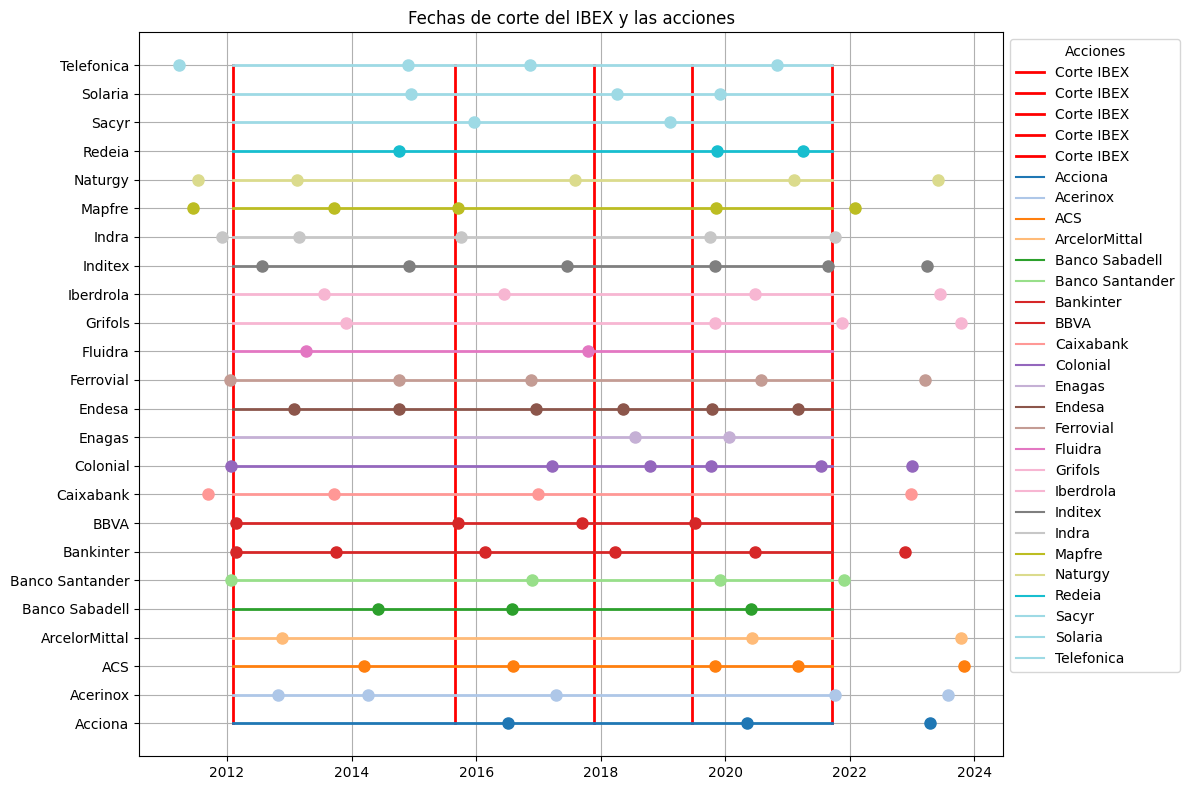

In [4]:
import matplotlib.pyplot as plt
import random

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 8))

# Definir colores únicos para cada acción
colores = plt.cm.get_cmap('tab20', len(fechas_dt) - 1)

# Graficar los cortes del IBEX en rojo (agregar etiqueta solo una vez)
for ibex_fecha in ibex_cortes:
    # Asegurarnos de que el corte se grafique en el rango adecuado
    ax.plot([ibex_fecha, ibex_fecha], [0, len(fechas_dt) - 2], color='red', linestyle='-', lw=2, label='Corte IBEX')

# Graficar los cortes de las acciones con colores únicos
for i, (accion, cortes) in enumerate(fechas_dt.items()):
    if accion == 'IBEX 35':  # No graficar los cortes del IBEX
        continue
    # Asignar un color único a cada acción
    color = colores(i)

    # Dibujar una línea horizontal para cada acción (bajar la línea aún más)
    ax.plot([min(ibex_cortes), max(ibex_cortes)], [i-1, i-1], color=color, lw=2)  # Línea horizontal representando la acción

    # Graficar los cortes para cada acción
    for corte in cortes:
        # Agregar el corte como un punto sobre la línea correspondiente
        ax.plot(corte, i-1, 'o', color=color, markersize=8)  # Usamos 'o' como marcador para los cortes

    # Añadir solo una vez la leyenda para cada acción
    ax.plot([], [], color=color, label=accion)

# Configuración de etiquetas
ax.set_yticks(range(len(fechas_dt) - 1))
ax.set_yticklabels([accion for accion in fechas_dt.keys() if accion != 'IBEX 35'])
ax.set_title("Fechas de corte del IBEX y las acciones")
ax.grid(True)

# Mostrar la leyenda (sin etiquetas repetidas)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Acciones')

# Mejorar el ajuste del gráfico
plt.tight_layout()
plt.show()



In [ ]:
pip install pandas numpy matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np

# Tus datos de fechas
fechas = {
    'IBEX 35': ['2012-02-07', '2015-09-01', '2017-11-24', '2019-06-20', '2021-09-17'],
    'Acciona': ['2016-07-07', '2020-05-06', '2023-04-17'],
    'Acerinox': ['2012-10-23', '2014-04-04', '2017-04-12', '2021-10-05', '2023-08-02'],
    'ACS': ['2014-03-12', '2016-08-05', '2019-10-30', '2021-03-03', '2023-11-02'],
    'ArcelorMittal': ['2012-11-21', '2020-06-05', '2023-10-17'],
    'Banco Sabadell': ['2014-06-05', '2016-07-29', '2020-06-01'],
    'Banco Santander': ['2012-01-27', '2016-11-25', '2019-12-03', '2021-11-29'],
    'Bankinter': ['2012-02-20', '2013-10-03', '2016-02-24', '2018-03-23', '2020-06-25', '2022-11-23'],
    'BBVA': ['2012-02-23', '2015-09-16', '2017-09-14', '2019-07-10'],
    'Caixabank': ['2011-09-13', '2013-09-17', '2016-12-29', '2022-12-27'],
    'Colonial': ['2012-01-25', '2017-03-23', '2018-10-15', '2019-10-10', '2021-07-14', '2022-12-30'],
    'Enagas': ['2018-07-19', '2020-01-21'],
    'Endesa': ['2013-01-30', '2014-10-06', '2016-12-19', '2018-05-10', '2019-10-16', '2021-03-03'],
    'Ferrovial': ['2012-01-17', '2014-10-06', '2016-11-15', '2020-07-28', '2023-03-17'],
    'Fluidra': ['2013-04-10', '2017-10-19'],
    'Grifols': ['2013-11-27', '2019-11-01', '2021-11-18', '2023-10-12'],
    'Iberdrola': ['2013-07-23', '2016-06-15', '2020-06-22', '2023-06-12'],
    'Inditex': ['2012-07-24', '2014-12-03', '2017-06-14', '2019-11-01', '2021-08-26', '2023-03-28'],
    'Indra': ['2011-12-02', '2013-02-25', '2015-10-05', '2019-10-03', '2021-10-06'],
    'Mapfre': ['2011-06-16', '2013-09-17', '2015-09-15', '2019-11-08', '2022-02-02'],
    'Naturgy': ['2011-07-14', '2013-02-14', '2017-08-01', '2021-02-05', '2023-05-31'],
    'Redeia': ['2014-10-06', '2019-11-14', '2021-04-01'],
    'Sacyr': ['2015-12-22', '2019-02-11'],
    'Solaria': ['2014-12-17', '2018-04-04', '2019-11-29'],
    'Telefonica': ['2011-03-23', '2014-11-27', '2016-11-14', '2020-10-30']
}

# Convertimos las fechas a tipo datetime
for company in fechas:
    fechas[company] = pd.to_datetime(fechas[company])

# Definimos la fecha inicial (puede ser la fecha más temprana de todas las acciones)
fecha_inicial = min(min(fechas[company]) for company in fechas)

# Convertimos las fechas en número de días desde la fecha inicial
fechas_numericas = {}

# Encuentra el número máximo de eventos para cualquier acción
max_len = max(len(dates) for dates in fechas.values())

for company, dates in fechas.items():
    # Calculamos los días desde la fecha inicial
    dates_numericos = [(date - fecha_inicial).days for date in dates]

    # Rellenamos con NaN para igualar las longitudes
    dates_numericos.extend([np.nan] * (max_len - len(dates)))
    fechas_numericas[company] = dates_numericos

# Convertimos a un DataFrame de pandas
df_fechas = pd.DataFrame(fechas_numericas)

# Calculamos la matriz de correlación entre las fechas de los eventos
correlations = df_fechas.corr()

# Mostrar la matriz de correlación como una tabla
print("Matriz de correlación entre las fechas de los eventos:")
print(correlations)

# Mostrar las correlaciones específicas con el IBEX 35
ibex_corr = correlations['IBEX 35'].sort_values(ascending=False)
print("\nCorrelación con el IBEX 35:")
print(ibex_corr)



Matriz de correlación entre las fechas de los eventos:
                  IBEX 35   Acciona  Acerinox       ACS  ArcelorMittal  \
IBEX 35          1.000000  0.998385  0.954762  0.991810       0.996353   
Acciona          0.998385  1.000000  0.962092  0.987182       0.989897   
Acerinox         0.954762  0.962092  1.000000  0.969757       0.913704   
ACS              0.991810  0.987182  0.969757  1.000000       0.954580   
ArcelorMittal    0.996353  0.989897  0.913704  0.954580       1.000000   
Banco Sabadell   0.957182  0.972081  0.999225  0.997070       0.928991   
Banco Santander  0.999931  0.998369  0.914297  0.986391       0.996378   
Bankinter        0.980742  0.982701  0.989716  0.992967       0.946514   
BBVA             0.999337  0.996299  0.925550  0.983901       0.998421   
Caixabank        0.914491  0.977434  0.999069  0.934325       0.937608   
Colonial         0.980858  0.974952  0.885763  0.951272       0.996638   
Enagas           1.000000  1.000000  1.000000  1.000000  